## Task 1: Data Exploration, Pre-Processing and Augmentation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from funcs_Task1 import get_distribution_barplot, plotImages, training_data_Pipeline, test_validation_data_Pipeline, get_augmented_images

plt.rcParams.update({'font.size': 14})

### 1. Loading Data

In [2]:
# paths
train_dir = 'covid xray/train'
val_dir = 'covid xray/val'
test_dir = 'covid xray/test'

# constants
batch_size = 128
img_height = img_width = 299

In [3]:
# image generators for training, validation, and test data
train_image_generator = ImageDataGenerator(rescale=1./255)
val_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

# Load as arrays (flow_from_directory method)
train_generator = train_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(img_height, img_width),
    class_mode='binary'
)

val_generator = val_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=val_dir,
    shuffle=True,
    target_size=(img_height, img_width),
    class_mode='binary'
)

test_generator = test_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=test_dir,
    shuffle=True,
    target_size=(img_height, img_width),
    class_mode='binary'
)

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


### 2. Data Exploration

##### Training Data

In [4]:
# Get training dataset size
train_size = train_generator.samples
print(f"Training dataset size: {train_size}")

# Check the size of a sample image
sample_batch, labels = next(train_generator)
print(f"Sample image shape: {sample_batch.shape}")

Training dataset size: 1600
Sample image shape: (128, 299, 299, 3)


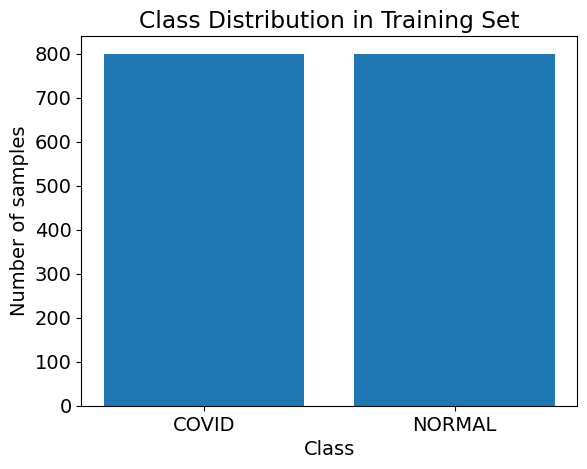

In [5]:
# Distribution of classes in the training set
get_distribution_barplot(train_generator, set = "Training")

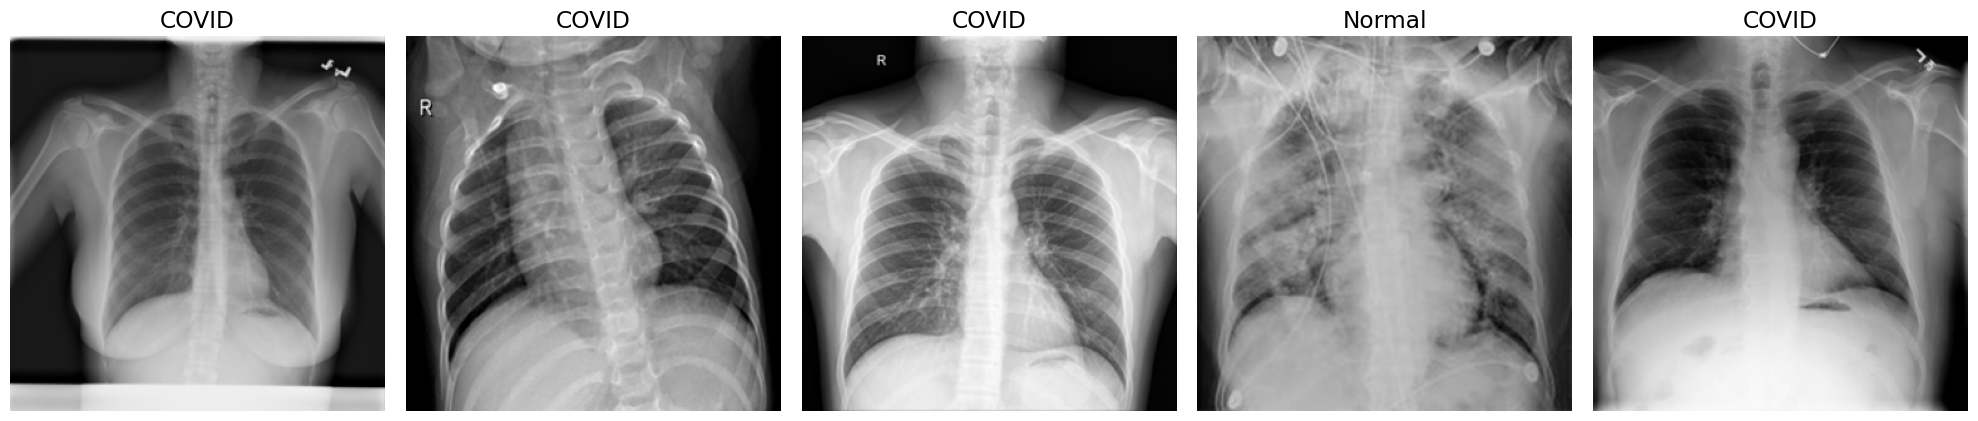

In [6]:
# Plot some sample images from each class
plotImages(sample_batch[:5], labels[:5])

In [7]:
# Calculate pixel average and standard deviation for the training data
global_mean = np.mean(sample_batch)
global_std = np.std(sample_batch)

print(f"Global Sample Average: {global_mean:.2f}")
print(f"Global Sample Standard Deviation: {global_std:.2f}")

Global Sample Average: 0.53
Global Sample Standard Deviation: 0.24


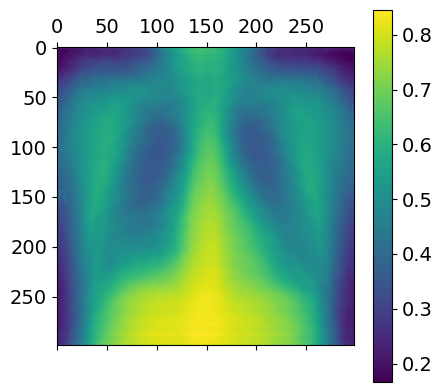

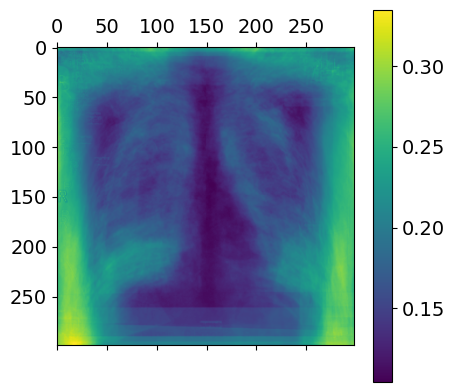

In [8]:
#Calculate pixel average and standard deviation for the training data
#XX TODO: make nicer images
pixel_mean = np.mean(sample_batch, axis=0)[:,:,0]
pixel_std = np.std(sample_batch, axis = 0)[:,:,0]

plt.matshow(pixel_mean)
plt.colorbar()
plt.matshow(pixel_std)
plt.colorbar()

##### Test Set

In [9]:
# Get test dataset size
test_size = test_generator.samples
print(f"Test dataset size: {test_size}")

# Check if they have all the same size
test_sample_batch, test_labels = next(test_generator)
print(f"Sample image shape: {test_sample_batch.shape}")

Test dataset size: 200
Sample image shape: (128, 299, 299, 3)


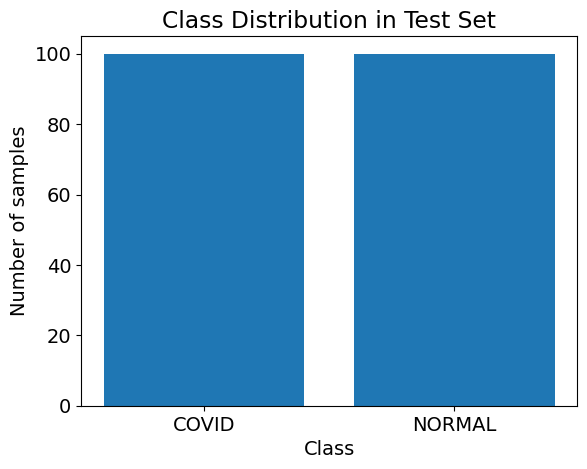

In [10]:
# Distribution of classes in the test set
get_distribution_barplot(test_generator, set = "Test")

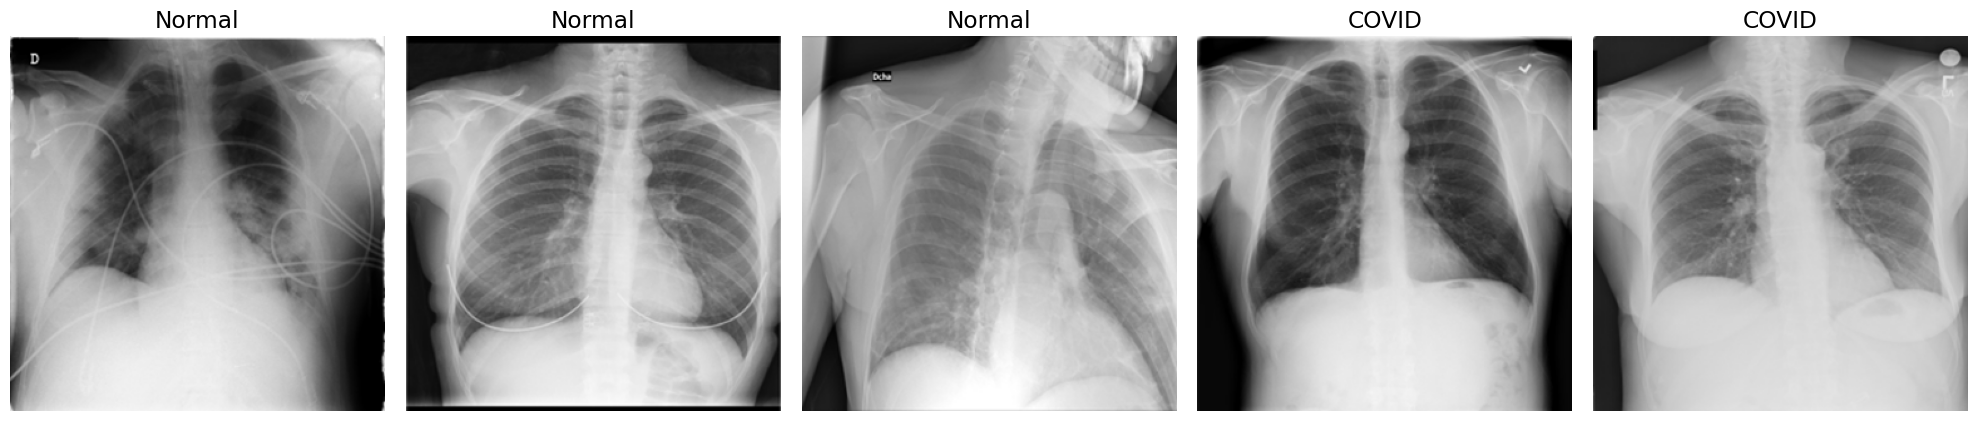

In [11]:
# Plot some sample images from each class
plotImages(test_sample_batch[:5], test_labels[:5])

In [12]:
# Calculate pixel average and standard deviation for the test data
test_global_mean = np.mean(test_sample_batch)
test_global_std = np.std(test_sample_batch)

print(f"Global Sample Average: {test_global_mean:.2f}")
print(f"Global Sample Standard Deviation: {test_global_std:.2f}")

Global Sample Average: 0.55
Global Sample Standard Deviation: 0.25


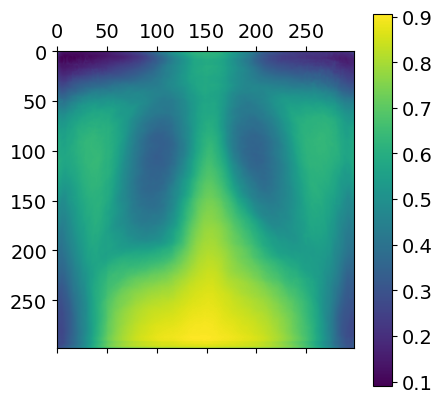

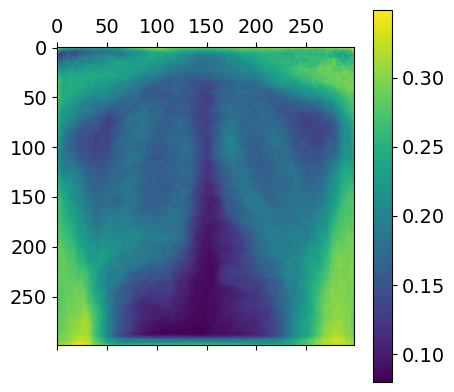

In [13]:
#Calculate pixel average and standard deviation for the training data
#XX TODO: make nicer images
test_pixel_mean = np.mean(test_sample_batch, axis=0)[:,:,0]
test_pixel_std = np.std(test_sample_batch, axis = 0)[:,:,0]

plt.matshow(test_pixel_mean)
plt.colorbar()
plt.matshow(test_pixel_std)
plt.colorbar()

##### Validation Set

In [14]:
# Get test dataset size
val_size = val_generator.samples
print(f"Validation dataset size: {val_size}")

# Check if they have all the same size
val_sample_batch, val_labels = next(val_generator)
print(f"Sample image shape: {val_sample_batch.shape}")

Validation dataset size: 400
Sample image shape: (128, 299, 299, 3)


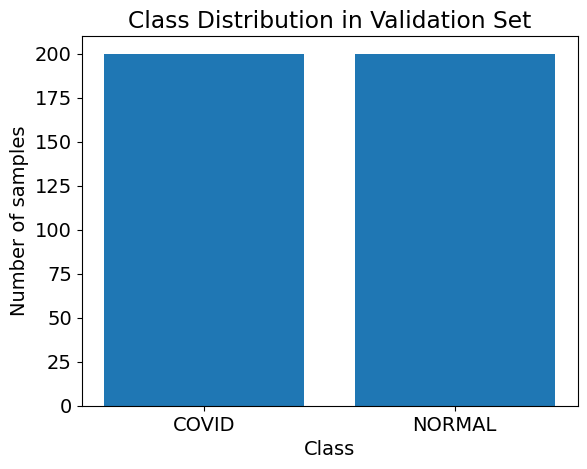

In [15]:
# Distribution of classes in the validation set
get_distribution_barplot(val_generator, set = "Validation")

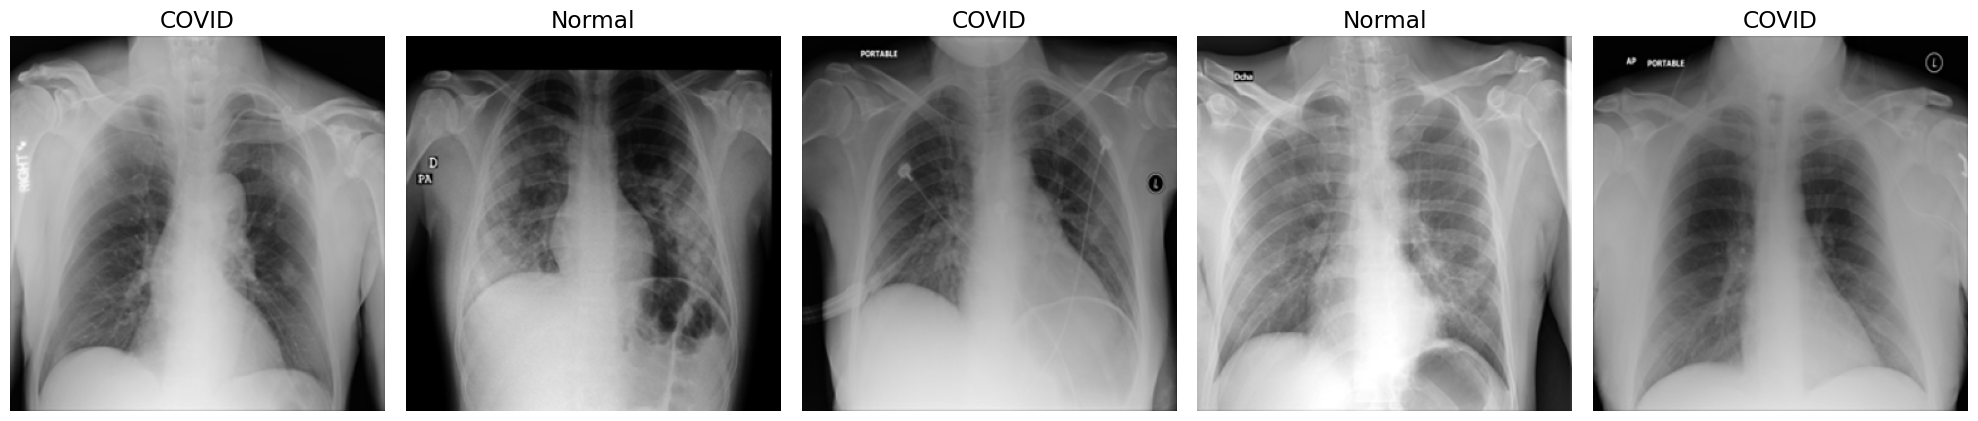

In [16]:
# Plot some sample images from each class
plotImages(val_sample_batch[:5], val_labels[:5])

In [17]:
# Calculate pixel average and standard deviation for the validation data
val_global_mean = np.mean(val_sample_batch)
val_global_std = np.std(val_sample_batch)

print(f"Global Sample Average: {val_global_mean:.2f}")
print(f"Global Sample Standard Deviation: {val_global_std:.2f}")

Global Sample Average: 0.52
Global Sample Standard Deviation: 0.26


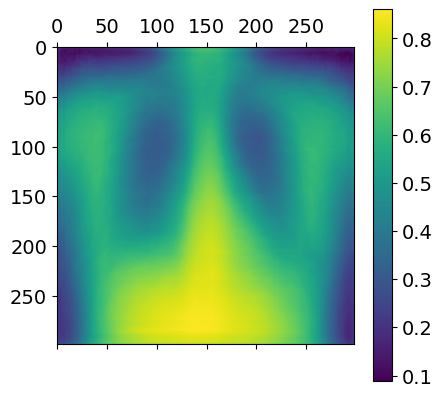

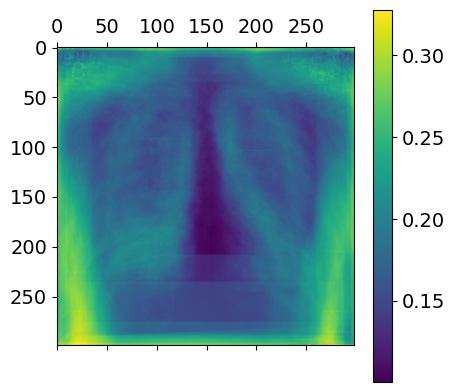

In [18]:
#Calculate pixel average and standard deviation for the training data
#XX TODO: make nicer images
val_pixel_mean = np.mean(val_sample_batch, axis=0)[:,:,0]
val_pixel_std = np.std(val_sample_batch, axis = 0)[:,:,0]

plt.matshow(val_pixel_mean)
plt.colorbar()
plt.matshow(val_pixel_std)
plt.colorbar()

### 3. Pre-Processing

In [19]:
# rescale size
img_size = (128, 128)

# Use training dataset statistics for normalization
train_image_generator = ImageDataGenerator(rescale=1./255, 
                                           featurewise_center=True, 
                                           featurewise_std_normalization=True)
train_image_generator.mean = global_mean
train_image_generator.std = global_std  

# Validation and test sets use the same mean and std as the training set
val_image_generator = ImageDataGenerator(rescale=1./255, 
                                         featurewise_center=True, 
                                         featurewise_std_normalization=True)
val_image_generator.mean = global_mean 
val_image_generator.std = global_std    

test_image_generator = ImageDataGenerator(rescale=1./255, 
                                          featurewise_center=True, 
                                          featurewise_std_normalization=True)
test_image_generator.mean = global_mean 
test_image_generator.std = global_std  

# Load datasets with new preprocessing
train_generator = train_image_generator.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size, class_mode='binary'
    )
val_generator = val_image_generator.flow_from_directory(
    val_dir, target_size=img_size, batch_size=batch_size, class_mode='binary'
    )
test_generator = test_image_generator.flow_from_directory(
    test_dir, target_size=img_size, batch_size=batch_size, class_mode='binary'
    )

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [20]:
# Check Normalization on Validation Sample 
val_sample, _ = next(val_generator)
print(f"Validation mean after normalization: {np.mean(val_sample):.2f}")
print(f"Validation std after normalization: {np.std(val_sample):.2f}")

Validation mean after normalization: 0.06
Validation std after normalization: 1.06


### 4. Data Augmentation

Found 1600 images belonging to 2 classes.


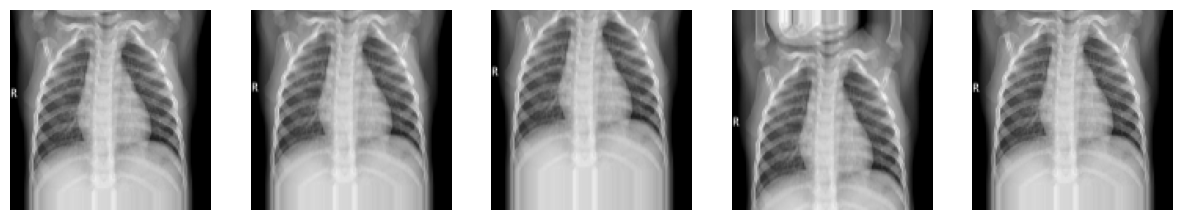

In [21]:
# Translation
trans_gen = ImageDataGenerator(rescale=1./255, width_shift_range=0.2)
trans_images = get_augmented_images(trans_gen, train_dir)



Found 1600 images belonging to 2 classes.


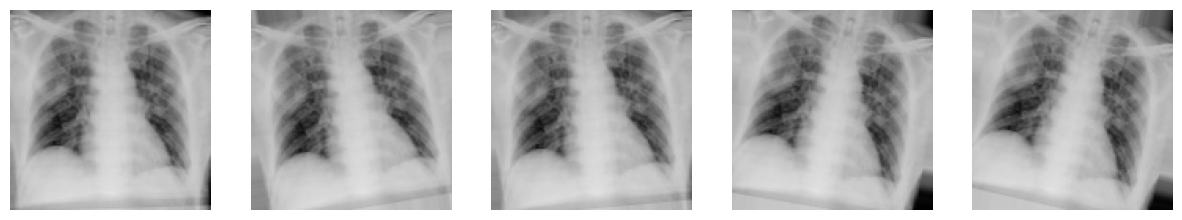

In [22]:
# Rotation 
rotate_gen = ImageDataGenerator(rescale=1./255, rotation_range=15)
rotate_images = get_augmented_images(rotate_gen, train_dir)


Found 1600 images belonging to 2 classes.


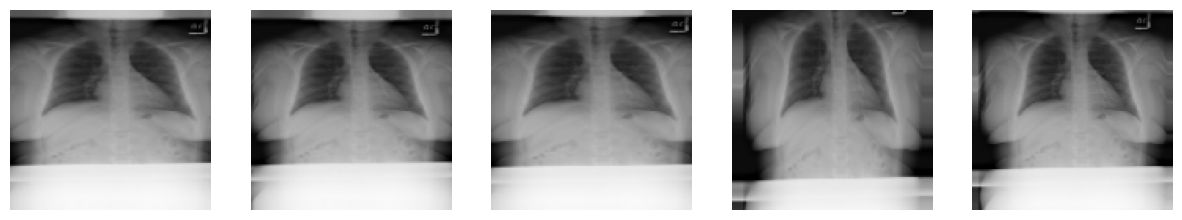

In [23]:
# Zoom 
zoom_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.2)
zoom_images = get_augmented_images(zoom_gen, train_dir)

Found 1600 images belonging to 2 classes.


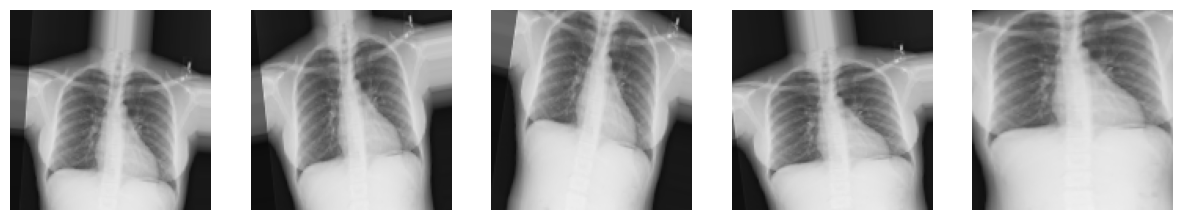

In [24]:

# Combined 
combined_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    width_shift_range=0.2
)

combined_images = get_augmented_images(combined_gen, train_dir)

### 5. Pipelines

In [25]:
# test training data pipeline
train_data_gen = training_data_Pipeline(batch_size, img_size, train_dir)
train_sample, labels = next(train_data_gen)
train_sample.shape

Found 1600 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.


(128, 128, 128, 3)

In [26]:
# test validation and test data pipeline
val_data_gen = test_validation_data_Pipeline(batch_size, img_size, train_dir, test_dir=val_dir)
val_sample, labels = next(val_data_gen)
val_sample.shape

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


(128, 128, 128, 3)